# Аналитика в Яндекс.Афише

Вас пригласили на стажировку в отдел аналитики Яндекс.Афиши. Первое задание: помочь маркетологам оптимизировать маркетинговые затраты.

У вас в распоряжении есть данные от Яндекс.Афиши с июня 2017 по конец мая 2018 года:
- лог сервера с данными о посещениях сайта Яндекс.Афиши,
- выгрузка всех заказов за этот период,
- статистика рекламных расходов.

**Шаг 1. Загрузите данные и подготовьте их к анализу**

Загрузите данные о визитах, заказах и расходах в переменные. Оптимизируйте данные для анализа. Убедитесь, что тип данных в каждой колонке — правильный.

**Шаг 2. Постройте отчёты и посчитайте метрики**

Продукт

- Сколько людей пользуются в день, неделю, месяц?
- Сколько сессий в день?
- Сколько длится одна сессия?
- Как часто люди возвращаются?

Продажи

- Когда люди начинают покупать?
- Сколько раз покупают за период?
- Какой средний чек?
- Сколько денег приносят? (LTV)

Маркетинг

- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько стоило привлечение одного покупателя из каждого источника?
- На сколько окупились расходы? (ROI)

Отобразите на графиках, как эти метрики отличаются по устройствам и по рекламным источникам? Как они меняются во времени?

**Шаг 3. Напишите вывод: порекомендуйте маркетологам, куда и сколько им стоит вкладывать денег?**

Какие источники/платформы вы бы порекомендовали? Объясните свой выбор: на какие метрики вы ориентируетесь? Почему? Какие выводы вы сделали, узнав значение метрик?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

In [2]:
visits = pd.read_csv('/datasets/visits_log.csv')
orders = pd.read_csv('/datasets/orders_log.csv')
costs = pd.read_csv('/datasets/costs.csv')

In [3]:
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


Посмотрим на типы данных таблицы visits.

In [4]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


Выкинем дубликаты из таблицы visits, если таковые имеются.

In [5]:
visits = visits.drop_duplicates()

In [6]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 16.5+ MB


Дубликатов в таблице visits не было.

Переименуем столбцы, чтобы они начинались с маленькой буквы и не содержали пробелы. Переведем столбцы Start Ts и End Ts в тип данных datetime.

In [7]:
visits.rename(columns={'Device': 'device', 'End Ts': 'end_ts', 'Source Id': 'source_id', 'Start Ts': 'start_ts', 'Uid': 'uid'}, inplace=True)

In [8]:
visits['end_ts'] = pd.to_datetime(visits['end_ts'])
visits['start_ts'] = pd.to_datetime(visits['start_ts'])

Сделаем аналогичные операции для таблиц orders и costs.

In [9]:
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


Выкинем дубликаты из таблицы orders, если таковые имеются.

In [11]:
orders = orders.drop_duplicates()

In [12]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.5+ MB


Дубликатов в таблице orders не было.

In [13]:
orders.rename(columns={'Buy Ts': 'buy_ts', 'Revenue': 'revenue', 'Uid': 'uid'}, inplace=True)

In [14]:
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])

In [15]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [16]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


Выкинем дубликаты из таблицы costs, если таковые имеются.

In [17]:
costs = costs.drop_duplicates()

In [18]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 79.4+ KB


Дубликатов в таблице costs не было.

In [19]:
costs['dt'] = pd.to_datetime(costs['dt'])

В данном блоке мы сформировали 3 датафрейма, проверили на наличие дубликатов, переименовали столбцы и изменили тип данных(проблемы были у временных признаков, их нужно было перевести в тип datetime).

**Продукт**

**Сколько людей пользуются в день, неделю, месяц?**

Если считать заход в приложение как пользование продуктом, то тогда считать будем следующим образом:

Выделим из даты начала сессии месяц, неделю и день.

In [20]:
visits['visiting_month'] = visits['start_ts'].astype('datetime64[M]')
visits['visiting_week'] = visits['start_ts'].astype('datetime64[W]')
visits['visiting_day'] = visits['start_ts'].astype('datetime64[D]')

In [21]:
visits.head()

,device,end_ts,source_id,start_ts,uid,visiting_month,visiting_week,visiting_day
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-01,2017-12-14,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-01,2018-02-15,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-29,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-01,2018-05-17,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-01,2017-12-21,2017-12-27


Сгруппировав данные таблицы visits, получим значения метрик DAU, WAU, MAU и построим графики их изменения по времени.

In [22]:
dau = visits.groupby('visiting_day').agg('nunique')['uid']

In [23]:
print('Значение метрики DAU равно ' + str(round(dau.mean())))

Значение метрики DAU равно 908


/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


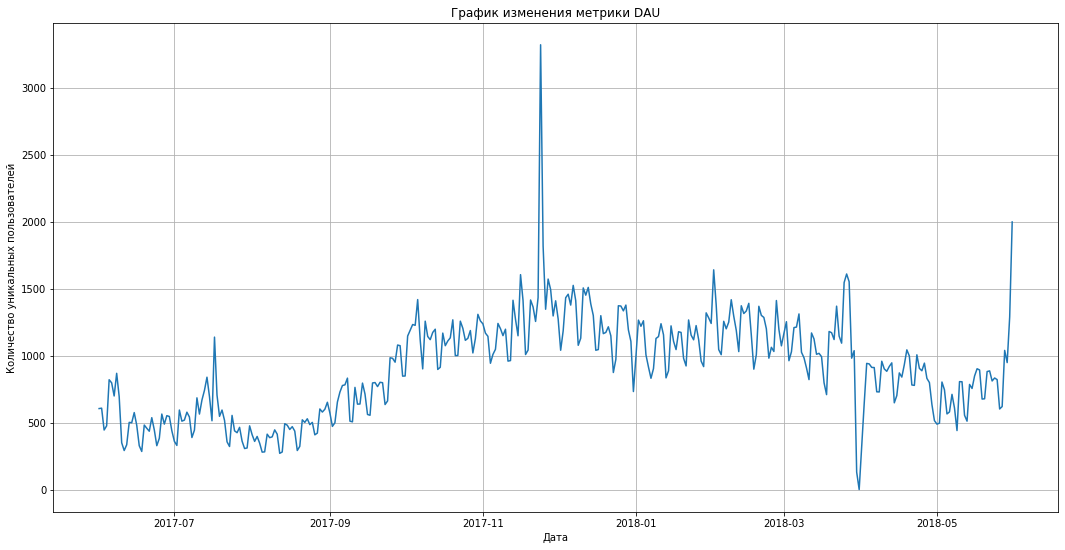

In [24]:
fig, ax = plt.subplots()
ax.plot(dau)
fig.set_size_inches(18, 9, forward=True)
ax.set_title('График изменения метрики DAU')
ax.set_ylabel('Количество уникальных пользователей')
ax.set_xlabel('Дата')
ax.grid()

In [25]:
wau = visits.groupby('visiting_week').agg('nunique')['uid']

In [26]:
print('Значение метрики WAU равно ' + str(round(wau.mean())))

Значение метрики WAU равно 5724


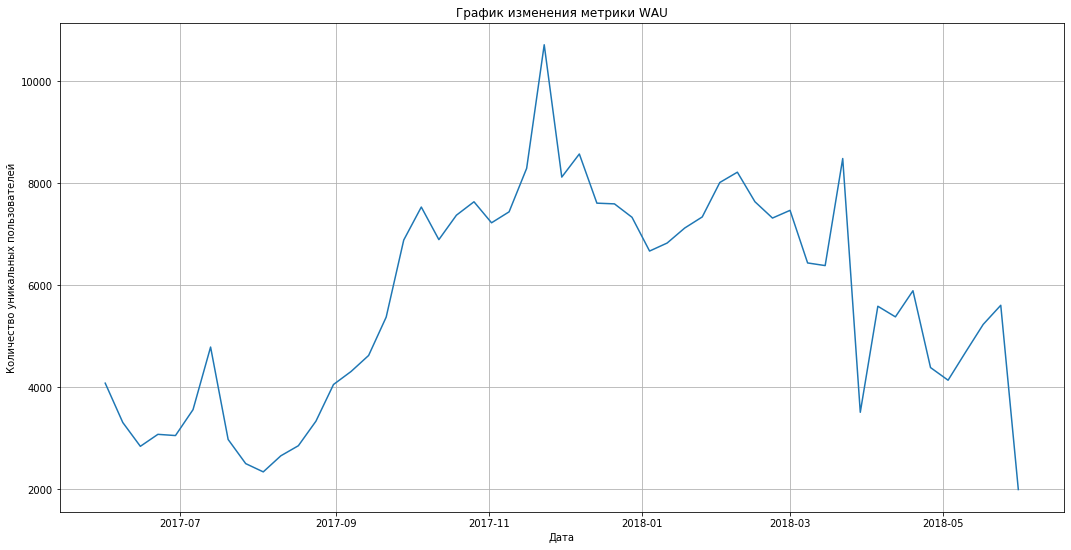

In [27]:
fig, ax = plt.subplots()
ax.plot(wau)
fig.set_size_inches(18, 9, forward=True)
ax.set_title('График изменения метрики WAU')
ax.set_ylabel('Количество уникальных пользователей')
ax.set_xlabel('Дата')
ax.grid()

In [28]:
mau = visits.groupby('visiting_month').agg('nunique')['uid']

In [29]:
print('Значение метрики MAU равно ' + str(round(mau.mean())))

Значение метрики MAU равно 23228


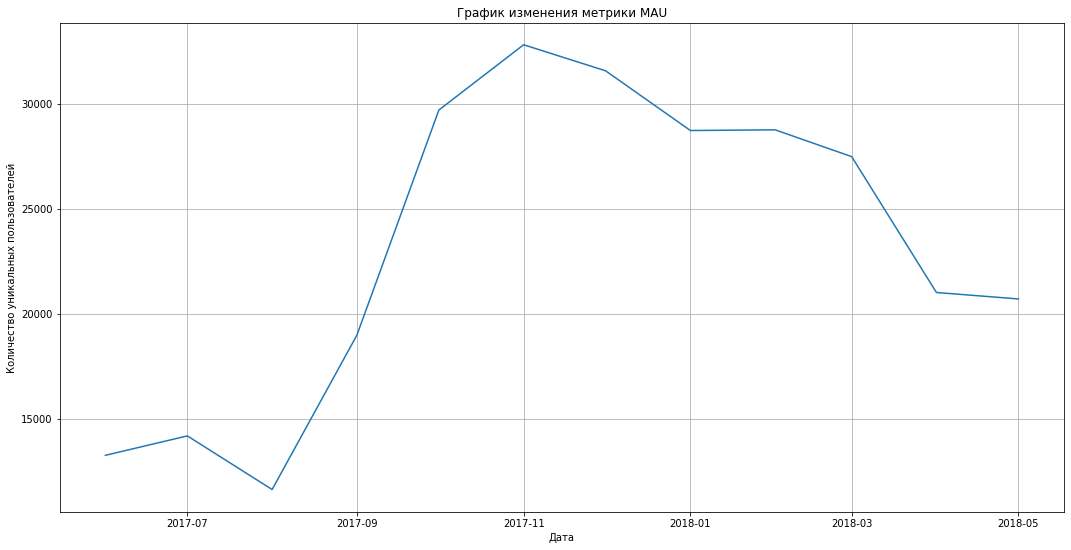

In [30]:
fig, ax = plt.subplots()
ax.plot(mau)
fig.set_size_inches(18, 9, forward=True)
ax.set_title('График изменения метрики MAU')
ax.set_ylabel('Количество уникальных пользователей')
ax.set_xlabel('Дата')
ax.grid()

По графикам можно увидеть сезонность интереса людей к нашему сервису. летом интерес минимальный, но уже начиная с сентября идет рост, который достигает своего пика в ноябре и держится на высоком уровне еще до марта, после чего непрерывно идет вниз. Возможно, причины заключается в том, что летом люди путешествуют заграницу, на дачи, поэтому им не очень интересны мероприятия. Зимой выбора для досуга меньше, в связи с этим и интерес пользователей возрастает.

**Сколько сессий в день?**

Для каждой сессии ранее уже были выделены дни, поэтому просто сгруппируем по дням и посчитаем количество сессий.

In [31]:
day_sessions = visits.groupby('visiting_day').agg('count')['start_ts']

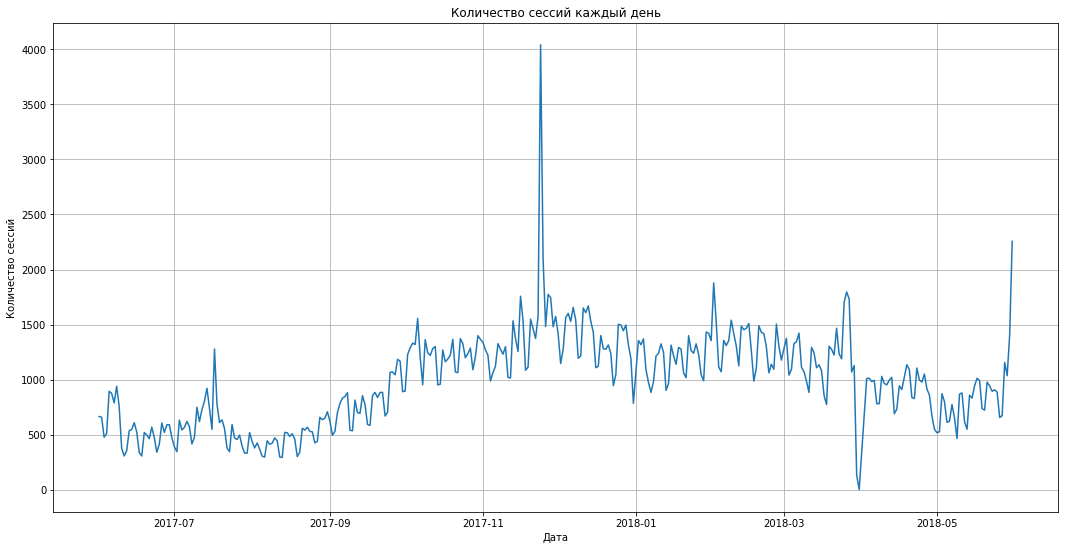

In [32]:
fig, ax = plt.subplots()
ax.plot(day_sessions)
fig.set_size_inches(18, 9, forward=True)
ax.set_title('Количество сессий каждый день')
ax.set_ylabel('Количество сессий')
ax.set_xlabel('Дата')
ax.grid()

Для оценки количества сессий в день возьмем среднее количество.

In [33]:
print('Количество сессий в день - ' + str(round(day_sessions.mean())))

Количество сессий в день - 987


График сессий очень сильно похож на график изменения метрики DAU. Можно сделать вывод, что количество сессий коррелирует с количеством уникальных пользователей, посещавших наш сервис каждый день, что довольно логично.

**Сколько длится одна сессия?**

Вычтем из времени конца сессии время ее начала для получения ее продолжительности.

In [34]:
visits['session_duration'] = (visits['end_ts'] - visits['start_ts'])/ np.timedelta64(1,'s')

Будем считать сессией ту, что длится больше 0 секунд.

In [35]:
session_duration = visits[visits['session_duration'] > 0]['session_duration']

Построим распределение времени всех сессий.

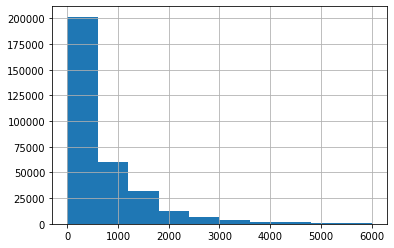

In [36]:
session_duration.hist(range = (0,6000))

In [37]:
session_duration.describe()

count    323604.000000
mean        714.169516
std        1026.349417
min          19.000000
25%         120.000000
50%         360.000000
75%         900.000000
max       42660.000000
Name: session_duration, dtype: float64

Так как распределение скошено, то для оценки длительности типичной сессии я возьму медиану, то есть 360 секунд.

Средняя сессия равная 6 минутам - это довольно большой результат, что может говорить о том, что пользователь нравится проводить время на нашем сервисе, следовательно люди, занимающиеся оформлением сайта поработали хорошо.

**Как часто люди возвращаются?**

Для того, чтобы понять, как часто люди возвращаются, будем расчитывать retention rate для месячных когорт.

Для каждого пользователя определим месяц его первого захода на наш сервис.

In [38]:
first_visit = visits.groupby('uid')['visiting_month'].min()
first_visit.name = 'first_visit'

Добавим эту информацию в исходную таблицу visits.

In [39]:
visits = visits.merge(first_visit,on='uid')

Расчитаем для каждого пользователя, в какой lifetime когорты он попадет.

In [40]:
visits['cohort_lifetime'] = visits['visiting_month'] - visits['first_visit']
visits['cohort_lifetime'] = round(visits['cohort_lifetime'] / np.timedelta64(1,'M'))
visits['cohort_lifetime'] = visits['cohort_lifetime'].astype(int)

Сгруппируем таблицу visits таким образом, чтобы получить для каждого lifetime количество людей.

In [41]:
cohorts = visits.groupby(['first_visit','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()

In [42]:
cohorts

,first_visit,cohort_lifetime,uid
0,2017-06-01,0,13259
1,2017-06-01,1,1043
2,2017-06-01,2,713
3,2017-06-01,3,814
4,2017-06-01,4,909
...,...,...,...
73,2018-03-01,1,861
74,2018-03-01,2,557
75,2018-04-01,0,15709
76,2018-04-01,1,760


Выделим для каждой когорты количество пользователей, присутствовавших в ней изначально.

In [43]:
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_visit','uid']]
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'})
initial_users_count

,first_visit,cohort_users
0,2017-06-01,13259
12,2017-07-01,13140
23,2017-08-01,10181
33,2017-09-01,16704
42,2017-10-01,25977
50,2017-11-01,27248
57,2017-12-01,25268
63,2018-01-01,22624
68,2018-02-01,22197
72,2018-03-01,20589


Добавим данные о начальном количестве пользователей в таблицу cohorts.

In [44]:
cohorts = cohorts.merge(initial_users_count,on='first_visit')

In [45]:
cohorts

,first_visit,cohort_lifetime,uid,cohort_users
0,2017-06-01,0,13259,13259
1,2017-06-01,1,1043,13259
2,2017-06-01,2,713,13259
3,2017-06-01,3,814,13259
4,2017-06-01,4,909,13259
...,...,...,...,...
73,2018-03-01,1,861,20589
74,2018-03-01,2,557,20589
75,2018-04-01,0,15709,15709
76,2018-04-01,1,760,15709


Теперь рассчитаем Retention Rate.

In [46]:
cohorts['retention'] = cohorts['uid']/cohorts['cohort_users']

Построим сводную таблицу и создадим тепловую карту.

In [47]:
retention_pivot = cohorts.pivot_table(index='first_visit',columns='cohort_lifetime',values='retention',aggfunc='sum')

In [48]:
retention_pivot

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_visit,,,,,,,,,,,,
2017-06-01,1.0,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-07-01,1.0,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,NaN
2017-08-01,1.0,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,NaN,NaN
2017-09-01,1.0,0.085489,0.069205,0.050706,0.039392,0.037835,0.035860,0.024186,0.022809,NaN,NaN,NaN
2017-10-01,1.0,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,NaN,NaN,NaN,NaN
2017-11-01,1.0,0.078281,0.044113,0.038682,0.033727,0.023415,0.021800,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.0,0.055802,0.037993,0.031107,0.020263,0.019036,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.0,0.059715,0.039339,0.024973,0.020244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.0,0.057080,0.025454,0.020093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


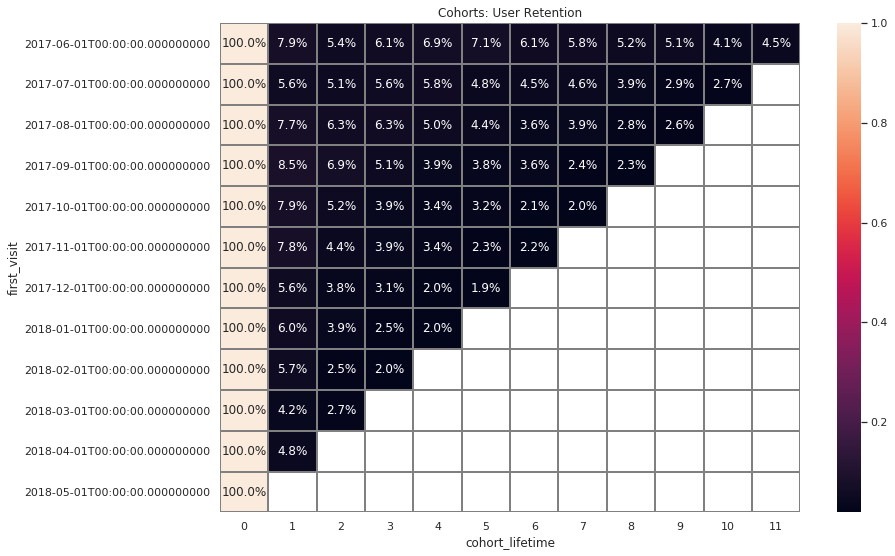

In [49]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: User Retention')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray');

Retention Rate у всех когорт уменьшается с течением времени, где - то довольно стремительно (например в 4 когорте, где в первый месяц был RR = 8.5%(лучший результат среди всех когорт для первого месяца), а в 4 упал аж до 3.9%), а где - то довольно плавно(например в 1 и 2 когорте за 6 месяцев RR упал всего на 1.8% и 0.8% соответственно). В целом, можно сделать вывод, что нашим сервисом люди постоянно не пользуются, они в основном ориентируются на единоразовую покупку.

**Продажи**

**Когда люди начинают покупать?**

В качестве метрики, с помощью которой мы будем оценивать время для первой покупки, возьмем разницу между первым визитом и первой покупкой пользователя.

In [50]:
orders['date_buy'] = orders['buy_ts'].astype('datetime64[D]')

Выделим для каждого пользователя самую раннюю дату покупки.

In [51]:
first_buy = orders.groupby('uid').agg({'date_buy' : 'min'})['date_buy']

In [52]:
first_buy

uid
313578113262317        2018-01-03
1575281904278712       2017-06-03
2429014661409475       2017-10-11
2464366381792757       2018-01-28
2551852515556206       2017-11-24
                          ...    
18445147675727495770   2017-11-24
18445407535914413204   2017-09-22
18445601152732270159   2018-03-26
18446156210226471712   2018-02-18
18446167067214817906   2017-10-17
Name: date_buy, Length: 36523, dtype: datetime64[ns]

In [53]:
first_buy.name = 'first_buy'

Присоединим эту информацию к таблице visits.

In [54]:
visits = visits.merge(first_buy, on = 'uid')

Посчитаем разницу между первой покупкой и первым визитом в днях.

In [55]:
visits['time_to_first_buy'] = (visits['first_buy'] - visits['first_visit'])// np.timedelta64(1,'D')

In [56]:
visits.head()

,device,end_ts,source_id,start_ts,uid,visiting_month,visiting_week,visiting_day,session_duration,first_visit,cohort_lifetime,first_buy,time_to_first_buy
0,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-01,2018-05-17,2018-05-20,1440.0,2018-03-01,2,2018-03-09,8
1,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018-03-01,2018-03-08,2018-03-09,1680.0,2018-03-01,0,2018-03-09,8
2,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017-09-01,2017-08-31,2017-09-03,60.0,2017-09-01,0,2017-09-04,3
3,desktop,2017-10-27 16:02:00,3,2017-10-27 15:20:00,16007536194108375387,2017-10-01,2017-10-26,2017-10-27,2520.0,2017-09-01,1,2017-09-04,3
4,desktop,2017-09-04 17:56:00,4,2017-09-04 17:37:00,16007536194108375387,2017-09-01,2017-08-31,2017-09-04,1140.0,2017-09-01,0,2017-09-04,3


Посторим распределение для полученых результатов.

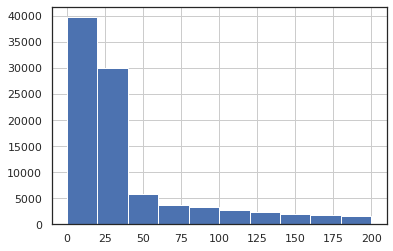

In [57]:
visits['time_to_first_buy'].hist(range = (0,200))

Так как распределение скошено, то в качестве меры оценки возьму медиану, которая равна 23 дням.

In [58]:
statistics.mode(visits['time_to_first_buy'])

23

In [59]:
visits['time_to_first_buy'].describe()

count    97394.000000
mean        47.304588
std         63.134919
min          0.000000
25%         11.000000
50%         23.000000
75%         49.000000
max        364.000000
Name: time_to_first_buy, dtype: float64

**Сколько раз покупают за период?**

В качестве периода возьмем отрезок времени, равный 6 месяцам. Проведем когортный анализ, чтобы посмотреть, сколько пользователи разных когорт покупают за указанный период.

Снова расчитаем месячные когорты, где в каждой ячейке будет среднее количество покупок клиента к определенной lifetime когорты.

In [60]:
orders['month_date_buy'] = orders['date_buy'].astype('datetime64[M]')

In [61]:
orders = orders.merge(first_visit, on = 'uid')

Расчитаем lifetime для каждого пользователя.

In [62]:
orders['cohort_lifetime'] = orders['month_date_buy'] - orders['first_visit']
orders['cohort_lifetime'] = round(orders['cohort_lifetime'] / np.timedelta64(1,'M'))
orders['cohort_lifetime'] = orders['cohort_lifetime'].astype(int)

Сгруппируем таблицу orders по столбцам first_visit и cohort_lifetime и посчитаем количество покупок и покупателей за каждый lifetime каждой когорты.

In [63]:
cohorts = orders.groupby(['first_visit','cohort_lifetime']).agg({'date_buy':'count', 'uid':'nunique'}).reset_index()

In [64]:
cohorts.head(5)

,first_visit,cohort_lifetime,date_buy,uid
0,2017-06-01,0,2354,2023
1,2017-06-01,1,387,231
2,2017-06-01,2,273,129
3,2017-06-01,3,442,188
4,2017-06-01,4,516,257


Выделим первоначальное количество пользователей каждой когорты и присоединим к таблице cohorts.

In [65]:
zero_lifetime = cohorts[cohorts['cohort_lifetime'] == 0][['first_visit','uid']]
zero_lifetime = zero_lifetime.rename(columns={'uid':'cohort_users'})

In [66]:
zero_lifetime.head()

,first_visit,cohort_users
0,2017-06-01,2023
12,2017-07-01,1753
23,2017-08-01,1208
33,2017-09-01,2257
42,2017-10-01,3761


In [67]:
cohorts = cohorts.merge(zero_lifetime, on = 'first_visit')

In [68]:
cohorts = cohorts.rename(columns={'date_buy':'number_of_buyings','uid':'number_of_customers_in_cohort_lifetime'})

Рассчитаем среднее количество покупок каждого lifetime каждой когорты.

In [69]:
cohorts['mean_number_of_buyings'] = cohorts['number_of_buyings']/cohorts['cohort_users']

In [70]:
cohorts.head(5)

,first_visit,cohort_lifetime,number_of_buyings,number_of_customers_in_cohort_lifetime,cohort_users,mean_number_of_buyings
0,2017-06-01,0,2354,2023,2023,1.163618
1,2017-06-01,1,387,231,2023,0.191300
2,2017-06-01,2,273,129,2023,0.134948
3,2017-06-01,3,442,188,2023,0.218487
4,2017-06-01,4,516,257,2023,0.255067


Построим сводную таблицу и создадим тепловую карту.

In [71]:
pivot_cohorts = cohorts.pivot_table(index = 'first_visit', values = 'mean_number_of_buyings', columns = 'cohort_lifetime', aggfunc = 'mean')
pivot_cohorts = pivot_cohorts.cumsum(axis=1)

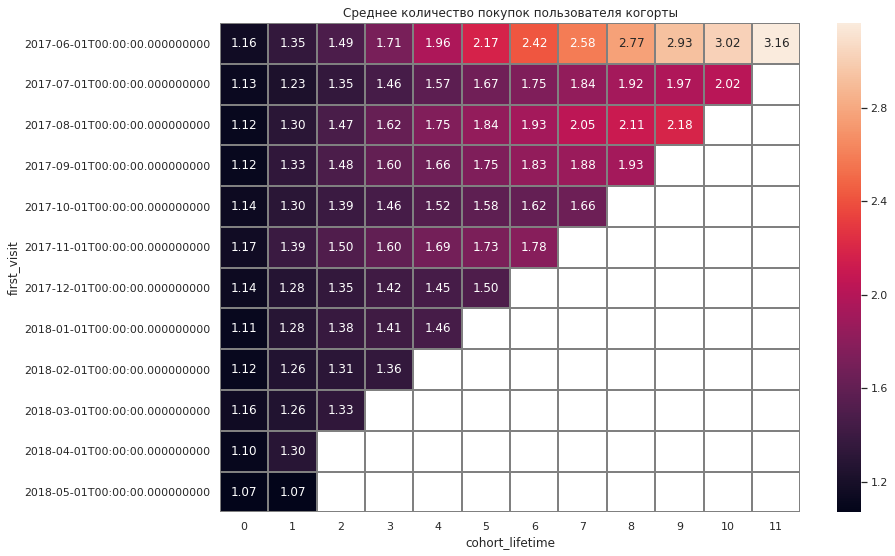

In [72]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Среднее количество покупок пользователя когорты')
sns.heatmap(pivot_cohorts, annot=True, fmt='.2f', linewidths=1, linecolor='gray');

Первые 7 когорт имеют период как минимум в 6 месяцев, поэтому по ним и будем оценивать среднее количество покупок. Общий показатель возьмем как среднее значение у всех этих когорт.

В среднем, за период в 6 месяцев, пользователи совершат 1.75 покупок.

**Какой средний чек?**

Чтобы ответить на этот вопрос, возьмем среднее значение отношения общей суммы заказов на общее количество уникальных клиентов каждый месяц. Таким образом получим средний чек для каждого пользователя, сделавшего заказ за каждый месяц.

Для каждого месяца найдем количество уникальных покупателей и количество потраченных денег.

In [73]:
mean_check = orders.groupby(['month_date_buy']).agg({'uid':'nunique', 'revenue': 'sum'})

In [74]:
mean_check.head()

,uid,revenue
month_date_buy,,
2017-06-01,2023,9557.49
2017-07-01,1984,12539.47
2017-08-01,1472,8758.78
2017-09-01,2750,18345.51
2017-10-01,4675,27987.70


Отношение всех расходов покупателей к количеству покупателей и будет значением искомой метрики.

In [75]:
mean_check['mean_check'] = mean_check['revenue']/mean_check['uid']

In [76]:
mean_check = mean_check['mean_check'] 

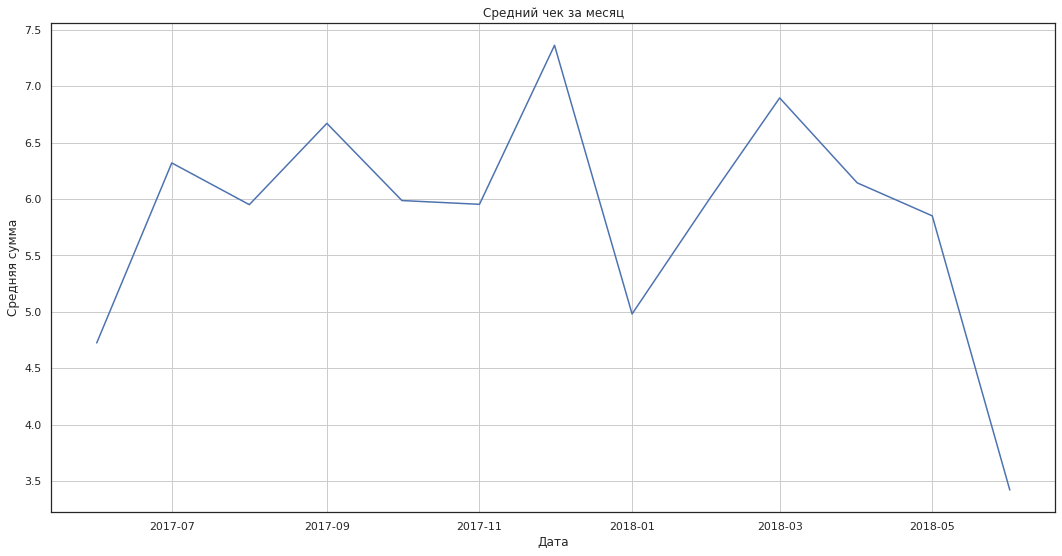

In [77]:
fig, ax = plt.subplots()
ax.plot(mean_check)
fig.set_size_inches(18, 9, forward=True)
ax.set_title('Средний чек за месяц')
ax.set_ylabel('Средняя сумма')
ax.set_xlabel('Дата')
ax.grid()

Можем видеть, что средняя сумма колеблется от месяца к месяцу вокруг 6.0 (последний месяц можно не брать во внимание, так как там всего одно наблюдение). Самое большое значение наблюдается в декабре, минимальное - в июне.

В общем, среднее значение среднего чека будет равно 6.07.

In [78]:
mean_check = mean_check.reset_index()
mean_check[~mean_check.index.isin([12])]['mean_check'].mean()

6.070389762358379

**Сколько денег приносят? (LTV)**

Присоединим к таблице orders к каждому uid дату их первой покупки.

In [79]:
orders = orders.merge(first_buy, on = 'uid')

In [80]:
orders['month_first_buy'] = orders['first_buy'].astype('datetime64[M]')

Посчитаем количество новых покупателей (n_buyers) за каждый месяц.

In [81]:
cohort_sizes = orders.groupby('month_first_buy').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['month_first_buy', 'n_buyers']
cohort_sizes.head()

,month_first_buy,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


Сгруппируем таблицу заказов по месяцу первой покупки и месяцу каждого заказа и сложим выручку.

In [82]:
cohorts_ltv = orders.groupby(['month_first_buy','month_date_buy']).agg({'revenue': 'sum'}).reset_index()
cohorts_ltv.head()

,month_first_buy,month_date_buy,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58


Добавим в таблицу cohorts данные о том, сколько людей первый раз совершили покупку в каждый месяц.

In [83]:
report_ltv = pd.merge(cohort_sizes, cohorts_ltv, on='month_first_buy')

Так как из условия задачи ничего не известно про маржинальность, то параметр margin rate опустим.

Рассчитаем для каждого пользователя возраст в его когорте.

In [84]:
report_ltv['age'] = (report_ltv['month_date_buy'] - report_ltv['month_first_buy']) / np.timedelta64(1, 'M')
report_ltv['age'] = report_ltv['age'].round().astype('int')
report_ltv.head()

,month_first_buy,n_buyers,month_date_buy,revenue,age
0,2017-06-01,2023,2017-06-01,9557.49,0
1,2017-06-01,2023,2017-07-01,981.82,1
2,2017-06-01,2023,2017-08-01,885.34,2
3,2017-06-01,2023,2017-09-01,1931.30,3
4,2017-06-01,2023,2017-10-01,2068.58,4


Теперь найдем LTV.

In [85]:
report_ltv['ltv'] = report_ltv['revenue'] / report_ltv['n_buyers']
report_ltv.head()

,month_first_buy,n_buyers,month_date_buy,revenue,age,ltv
0,2017-06-01,2023,2017-06-01,9557.49,0,4.724414
1,2017-06-01,2023,2017-07-01,981.82,1,0.485329
2,2017-06-01,2023,2017-08-01,885.34,2,0.437637
3,2017-06-01,2023,2017-09-01,1931.30,3,0.954671
4,2017-06-01,2023,2017-10-01,2068.58,4,1.022531


In [86]:
report_ltv

,month_first_buy,n_buyers,month_date_buy,revenue,age,ltv
0,2017-06-01,2023,2017-06-01,9557.49,0,4.724414
1,2017-06-01,2023,2017-07-01,981.82,1,0.485329
2,2017-06-01,2023,2017-08-01,885.34,2,0.437637
3,2017-06-01,2023,2017-09-01,1931.30,3,0.954671
4,2017-06-01,2023,2017-10-01,2068.58,4,1.022531
...,...,...,...,...,...,...
74,2018-03-01,3533,2018-05-01,1114.87,2,0.315559
75,2018-04-01,2276,2018-04-01,10600.69,0,4.657597
76,2018-04-01,2276,2018-05-01,1209.92,1,0.531599
77,2018-05-01,2988,2018-05-01,13925.76,0,4.660562


Построим сводную таблицу и создадим тепловую карту.

In [87]:
output_ltv = report_ltv.pivot_table(
        index='month_first_buy', 
        columns='age', 
        values='ltv', 
        aggfunc='mean')
output_ltv = output_ltv.cumsum(axis=1)

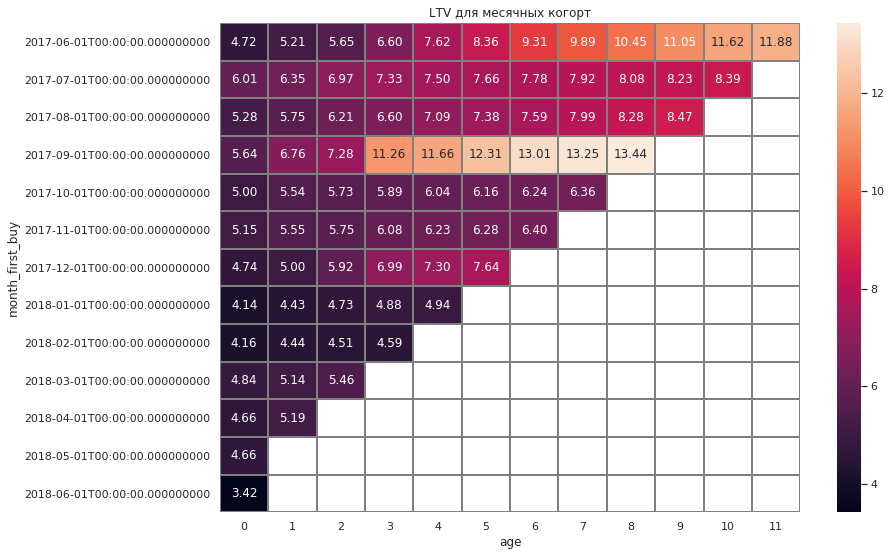

In [88]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('LTV для месячных когорт')
sns.heatmap(output_ltv, annot=True, fmt='.2f', linewidths=1, linecolor='gray');

Так как мы решили брать период в 6 месяцев, то для оценки среднего ltv нам подходят 7 когорт. Средний показатель ltv для этих когорт составляет 7.97

Теперь посчитаем LTV для двух имеющихся типов источника.

Рассмоторим, заходят ли пользователи с одного и того же устройства или с разных.

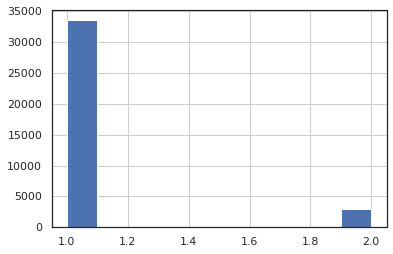

In [89]:
visits.groupby('uid')['device'].nunique().sort_values(ascending=False).hist()

Мы видим, что подавляющее большинство пользователей заходит с только с одного вида устройства. Для тех же, кто заходил с двух, целевым устройством сделаем то, с которого они заходили в первый раз.

In [90]:
sorted_visits = visits.sort_values(by = 'start_ts')

first_device = sorted_visits.groupby('uid')['device'].first()
first_device.columns = 'first_device'

In [91]:
orders = orders.merge(first_device, on = 'uid')

Напишем функцию для построение тепловой карты для определенного типа устройства.

In [92]:
def ltv_device(orders, device):

    orders_1_source = orders[orders['device'] == device]
    
    cohort_size_1_source = orders_1_source.groupby('month_first_buy').agg({'uid': 'nunique'}).reset_index()
    cohort_size_1_source.columns = ['month_first_buy', 'n_buyers']
    
    orders_1_source = orders_1_source.merge(cohort_size_1_source, on = 'month_first_buy')
    
    cohorts_1_source = orders_1_source.groupby(['month_first_buy','month_date_buy']).agg({'revenue': 'sum'}).reset_index()
    
    report_1_source = pd.merge(cohort_size_1_source, cohorts_1_source, on='month_first_buy')
    
    report_1_source['age'] = (report_1_source['month_date_buy'] - report_1_source['month_first_buy']) / np.timedelta64(1, 'M')
    report_1_source['age'] = report_1_source['age'].round().astype('int')
    report_1_source['ltv'] = report_1_source['revenue'] / report_1_source['n_buyers']

    output_ltv = report_1_source.pivot_table(
            index='month_first_buy', 
            columns='age', 
            values='ltv', 
            aggfunc='mean')
    output_ltv = output_ltv.cumsum(axis=1)

    sns.set(style='white')
    plt.figure(figsize=(13, 9))
    plt.title('LTV для месячных когорт для устройства '+ str(device))
    sns.heatmap(output_ltv, annot=True, fmt='.2f', linewidths=1, linecolor='gray');

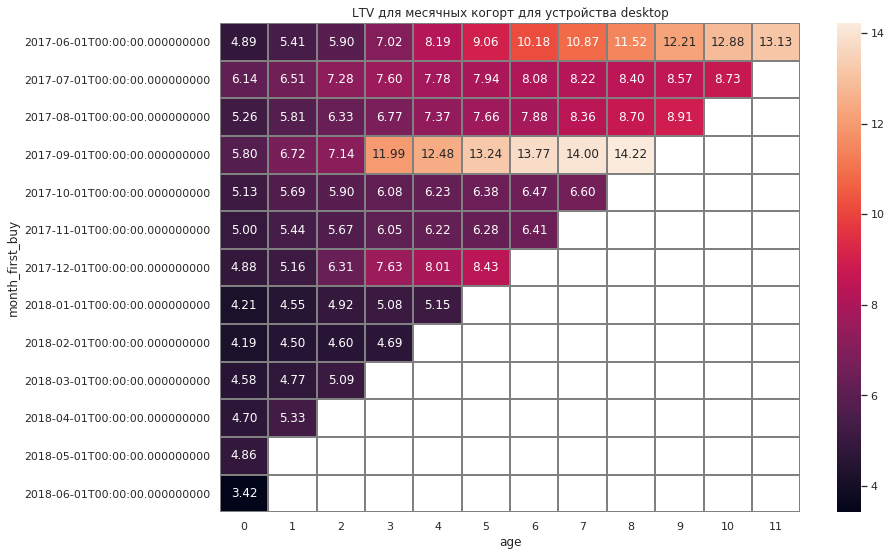

In [93]:
ltv_device(orders, 'desktop')

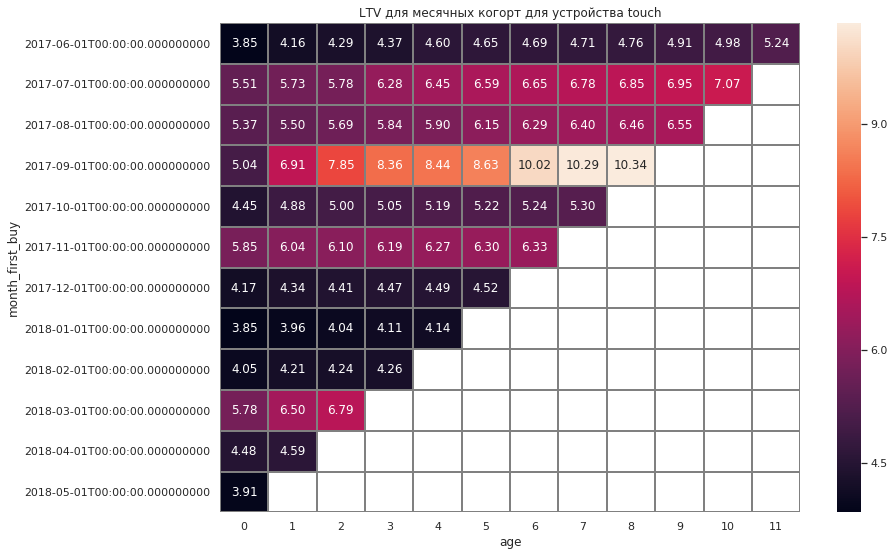

In [94]:
ltv_device(orders, 'touch')

Если в качестве периода для оценки снова возьмем 6 месяцев, то LTV для device будет равен 8.43, а для touch - 6. Мы можем видеть существенную разницу между двумя устройствами, поэтому можем смело сказать, что пользователи, использующие desktop, являются более перспективными для нашего бизнеса, чем те, кто пользуется touch.

**Сколько денег потратили? Всего / на каждый источник / по времени**

Общее сумма потраченых денег находится просто, суммирование по столбцу costs таблицы costs.

In [95]:
sum_cost = costs['costs'].sum()

In [96]:
sum_cost

329131.62

Чтобы найти, сколько потрачено на каждый источник, сгруппируем таблицу costs по источникам.

In [97]:
grouped_sources = costs.groupby('source_id').sum().sort_values(by = 'costs',ascending = False).reset_index()

In [98]:
grouped_sources['source_id'] = grouped_sources['source_id'].astype('str')

Построим распределение полученных результатов.

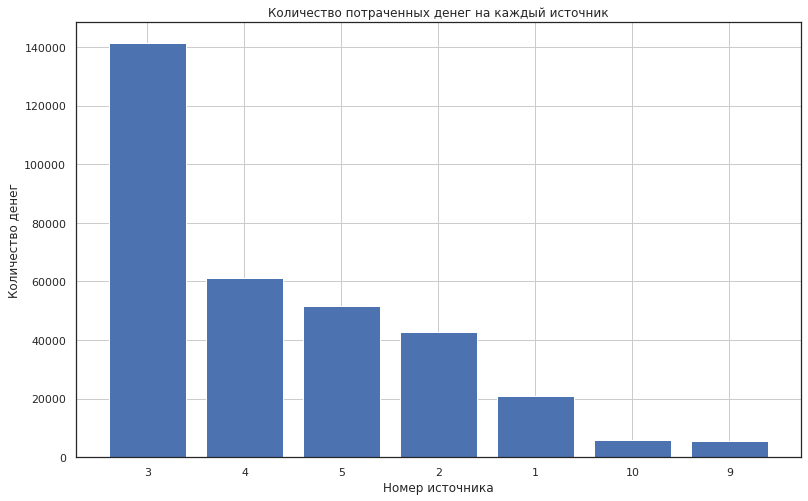

In [99]:
fig, ax = plt.subplots()
ax.bar( grouped_sources['source_id'], grouped_sources['costs'])
ax.set_ylabel('Количество денег')
ax.set_xlabel('Номер источника')
ax.set_title('Количество потраченных денег на каждый источник')
fig.set_size_inches(13, 8, forward=True)
ax.grid() 

Видно, что лидером по тратам является 3 источник, меньше же всего тратят на 9 и 10 источники.

Сгруппируем таблицу costs по дням и построим график изменения количества расходов от дня.

In [100]:
dayly_costs = costs.groupby('dt')['costs'].sum()

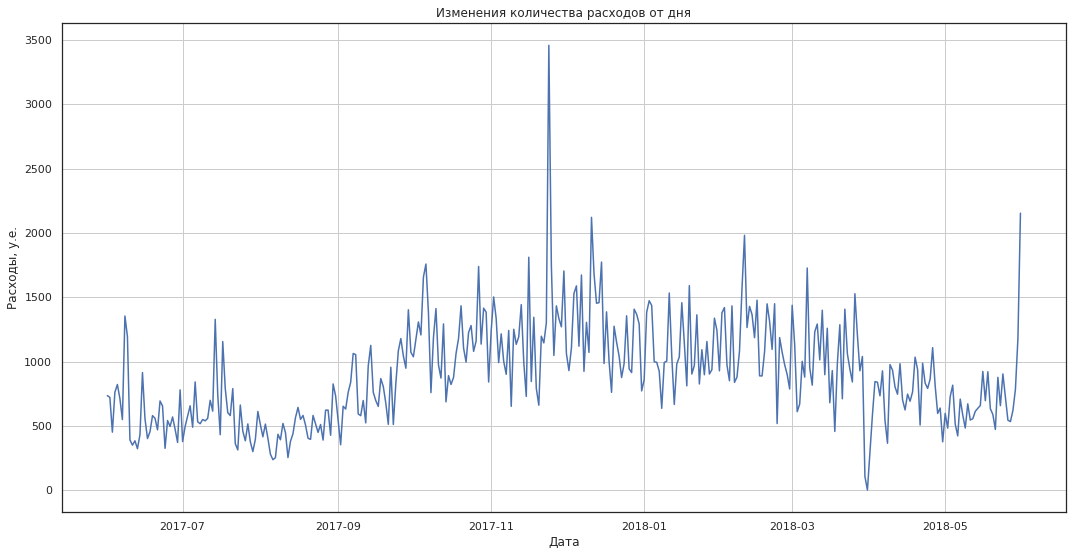

In [101]:
fig, ax = plt.subplots()
ax.plot(dayly_costs)
fig.set_size_inches(18, 9, forward=True)
ax.set_title('Изменения количества расходов от дня')
ax.set_ylabel('Расходы, у.е.')
ax.set_xlabel('Дата')
ax.grid()

Видно, что по своей тенденции график очень сильно напоминает график количества пользователей в день. Следовательно, можно сделать вывод, что траты на привлечение пользователей сильно влияют на посещаемость.

**Сколько стоило привлечение одного покупателя из каждого источника?**

Для начала нужно определить, с какого источника пришел пользователь. Будем считать, что его источник будет равняться источнику первого визита на сайт(так как мы не можем в точности сказать, с какого источника зашел пользователь во время покупки, то считать будем именно по его первому заходу).

Находим для каждого пользователя источник его первого захода на наш сервис.

In [102]:
sorted_visits = visits.sort_values(by = 'start_ts')
first_source = sorted_visits.groupby('uid')['source_id'].first()
first_source.name = 'first_source'

Присоединяем информацию о первом источнике к таблице orders.

In [103]:
orders = orders.merge(first_source, on = 'uid')

Посмотрим, сколько появлялось уникальных пользователей каждый день каждого источника.

In [104]:
count_sources = orders.groupby(['date_buy','first_source'])['uid'].count().reset_index()

In [105]:
count_sources

,date_buy,first_source,uid
0,2017-06-01,1,17
1,2017-06-01,2,13
2,2017-06-01,3,33
3,2017-06-01,4,11
4,2017-06-01,5,17
...,...,...,...
2470,2018-05-31,4,100
2471,2018-05-31,5,54
2472,2018-05-31,9,9
2473,2018-05-31,10,39


Присоеденяем эту информацию к таблице costs и убираем лишние столбцы.

In [106]:
costs = costs.merge(count_sources, left_on = ['source_id', 'dt'], right_on = ['first_source', 'date_buy'] )
costs.rename(columns={'uid': 'amount_of_users'}, inplace=True)
costs = costs[['source_id','dt','costs','amount_of_users']]
costs.head()

,source_id,dt,costs,amount_of_users
0,1,2017-06-01,75.20,17
1,1,2017-06-02,62.25,9
2,1,2017-06-03,36.53,11
3,1,2017-06-04,55.00,5
4,1,2017-06-05,57.08,26


Рассчитаем метрику САС.

In [107]:
costs['cac'] = costs['costs']/costs['amount_of_users']

In [108]:
costs.head()

,source_id,dt,costs,amount_of_users,cac
0,1,2017-06-01,75.20,17,4.423529
1,1,2017-06-02,62.25,9,6.916667
2,1,2017-06-03,36.53,11,3.320909
3,1,2017-06-04,55.00,5,11.000000
4,1,2017-06-05,57.08,26,2.195385


Посмотрим на общее среднее значение метрики.

In [109]:
mean_cac = costs['cac'].mean()

In [110]:
mean_cac

6.929336196180741

Теперь с разбивкой по источникам.

In [111]:
costs.groupby('source_id')['cac'].mean().sort_values(ascending = False)

source_id
3     12.281569
2      8.456133
5      6.113527
4      5.941721
10     5.710732
1      4.908409
9      4.786709
Name: cac, dtype: float64

Видно, что на 3 источник в среднем на посетителя тратится больше денег, чем на остальные. Это было предсказуемо, учитывая, что общие траты на 3 источник были также самые большие. Также любопытно, что траты на 1 источник были чуть ли не в 5 раз больше, чем на 10, однако показатель САС у 10 истоника больше чем у 1. Можно сделать вывод, что с 1 источника приводить людей выгодней, чем с 10.

График по дням/месяцам

In [112]:
costs['costs_month'] = costs['dt'].astype('datetime64[M]')

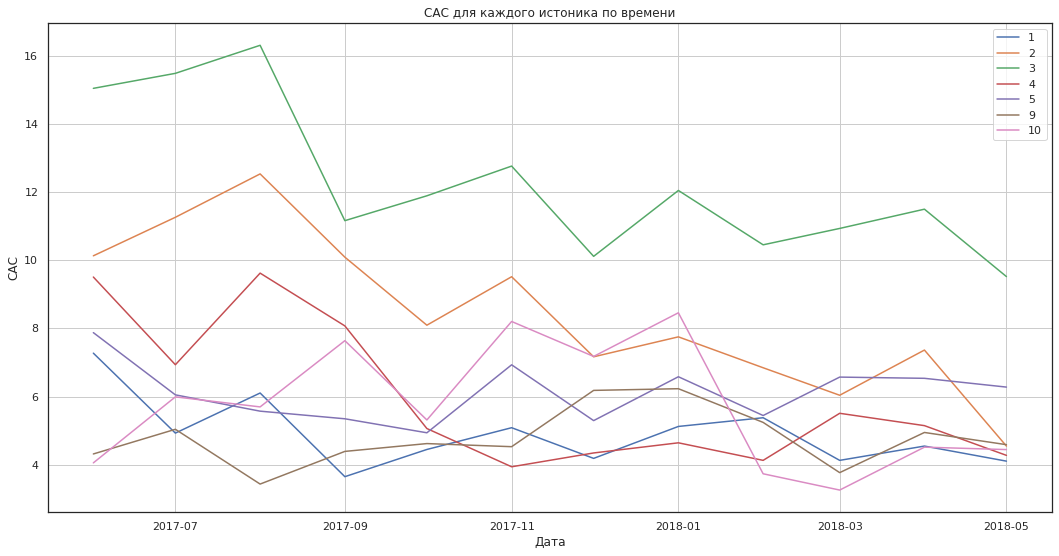

In [113]:
fig, ax = plt.subplots()
ax.plot(costs.pivot_table(columns = 'source_id', index = 'costs_month', values = 'cac', aggfunc = 'mean'))
fig.set_size_inches(18, 9, forward=True)
ax.set_title('CAC для каждого истоника по времени')
ax.set_ylabel('САС')
ax.set_xlabel('Дата')
ax.legend(costs['source_id'].unique())
ax.grid()

Глядя на график, можно сделать вывод, что на любом отрезке времени САС для 3 источника является наибольшим. Это должно навести на определенные мысли. Если ROMI этого источника будет низким, то стоит задуматься над тем, чтобы минимизировать расходы на 3 источник. Также стабильно высоко держиться САС источника 2. Все остальные источники изменяются примерно в одном и том же диапазоне.

**На сколько окупились расходы? (ROMI)**

Оценку метрики ROMI будем также смотреть по когортам.

Посчитаем расходы за каждый месяц по всем источникам.

In [114]:
monthly_costs = costs.groupby('costs_month').sum()['costs']
monthly_costs.head()

costs_month
2017-06-01    17941.09
2017-07-01    18105.67
2017-08-01    14714.55
2017-09-01    24296.34
2017-10-01    36297.43
Name: costs, dtype: float64

К уже сформированной раннее таблице report_ltv присоединим информацию по месячным рассходам по всем источникам.

In [115]:
report_new = pd.merge(report_ltv, monthly_costs, left_on='month_first_buy', right_on='costs_month')

In [116]:
report_new.head()

,month_first_buy,n_buyers,month_date_buy,revenue,age,ltv,costs
0,2017-06-01,2023,2017-06-01,9557.49,0,4.724414,17941.09
1,2017-06-01,2023,2017-07-01,981.82,1,0.485329,17941.09
2,2017-06-01,2023,2017-08-01,885.34,2,0.437637,17941.09
3,2017-06-01,2023,2017-09-01,1931.30,3,0.954671,17941.09
4,2017-06-01,2023,2017-10-01,2068.58,4,1.022531,17941.09


Рассчитаем САС.

In [117]:
report_new['cac'] = report_new['costs'] / report_new['n_buyers']

Теперь есть все данные для того, чтобы рассчитать ROMI.

In [118]:
report_new['romi'] = report_new['ltv'] / report_new['cac']

Построим сводную таблицу и создадим тепловую карту.

In [119]:
output = report_new.pivot_table(
        index='month_first_buy', 
        columns='age', 
        values='romi', 
        aggfunc='mean')

output = output.cumsum(axis=1).round(2)

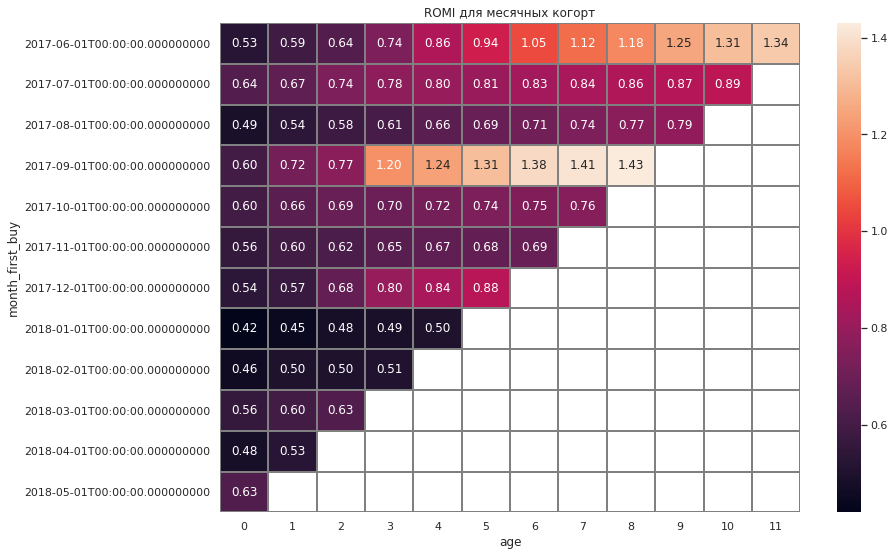

In [120]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('ROMI для месячных когорт')
sns.heatmap(output, annot=True, fmt='.2f', linewidths=1, linecolor='gray');

Напишем функцию, которая будет просчитывать тепловую карту для каждого источника и выводить информацию по среднему ROMI для каждого age(я не буду комментировать, что там делает каждая строка, так как все эти этапы были уже пройдены раннее).

In [121]:
def romi_for_source(n,orders, costs):
    
    orders_1_source = orders[orders['first_source'] == n]
    
    cohort_size_1_source = orders_1_source.groupby('month_first_buy').agg({'uid': 'nunique'}).reset_index()
    cohort_size_1_source.columns = ['month_first_buy', 'n_buyers']
    
    orders_1_source = orders_1_source.merge(cohort_size_1_source, on = 'month_first_buy')
    
    cohorts_1_source = orders_1_source.groupby(['month_first_buy','month_date_buy']).agg({'revenue': 'sum'}).reset_index()
    
    report_1_source = pd.merge(cohort_size_1_source, cohorts_1_source, on='month_first_buy')
    
    report_1_source['age'] = (report_1_source['month_date_buy'] - report_1_source['month_first_buy']) / np.timedelta64(1, 'M')
    report_1_source['age'] = report_1_source['age'].round().astype('int')
    report_1_source['ltv'] = report_1_source['revenue'] / report_1_source['n_buyers']
    
    costs_1_source = costs[costs['source_id'] == n]
    
    monthly_costs_1_source = costs_1_source.groupby('costs_month').sum()
    
    report_new_1_source = pd.merge(report_1_source, monthly_costs_1_source, left_on='month_first_buy', right_on='costs_month')
    report_new_1_source['cac'] = report_new_1_source['costs'] / report_new_1_source['n_buyers']
    report_new_1_source['romi'] = report_new_1_source['ltv'] / report_new_1_source['cac']
    
    output = report_new_1_source.pivot_table(
        index='month_first_buy', 
        columns='age', 
        values='romi', 
        aggfunc='mean')

    output = output.cumsum(axis=1)
    
    sns.set(style='white')
    plt.figure(figsize=(13, 9))
    plt.title('ROMI '+ str(n) + ' источника')
    sns.heatmap(output, annot=True, fmt='.2f', linewidths=1, linecolor='gray');
    print('Среднее значение ROMI когорт для '+ str(n)+ ' источника')
    print(output.mean(axis=0))

Среднее значение ROMI когорт для 1 источника
age
0     0.892768
1     1.048742
2     1.258675
3     1.363425
4     1.565990
5     1.768576
6     2.038114
7     2.362370
8     2.860597
9     3.462846
10    4.256256
11    5.679045
dtype: float64
Среднее значение ROMI когорт для 2 источника
age
0     0.549286
1     0.630051
2     0.777428
3     0.939189
4     1.085749
5     1.229496
6     1.029998
7     1.140317
8     1.215401
9     0.994079
10    1.290747
11    1.612957
dtype: float64
Среднее значение ROMI когорт для 3 источника
age
0     0.336151
1     0.357750
2     0.367152
3     0.379767
4     0.394988
5     0.413851
6     0.423732
7     0.442706
8     0.454574
9     0.429613
10    0.479128
11    0.470834
dtype: float64
Среднее значение ROMI когорт для 4 источника
age
0     0.757591
1     0.777118
2     0.791857
3     0.814921
4     0.843845
5     0.900297
6     0.980375
7     0.900496
8     0.904477
9     0.952753
10    1.165144
11    1.420471
dtype: float64
Среднее значение ROMI ко

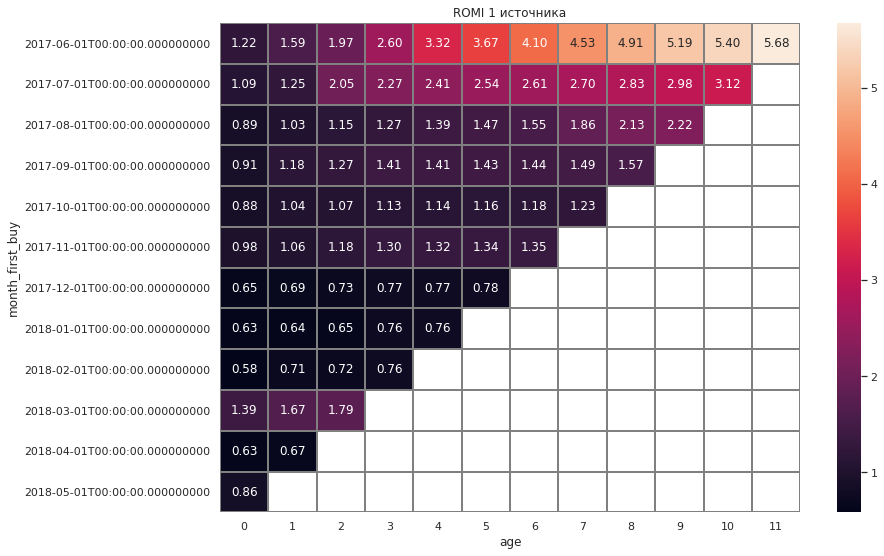

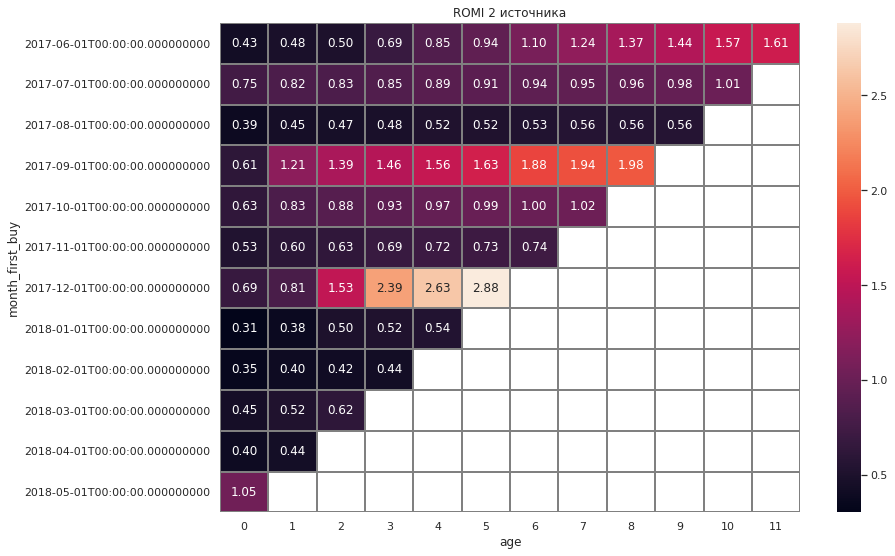

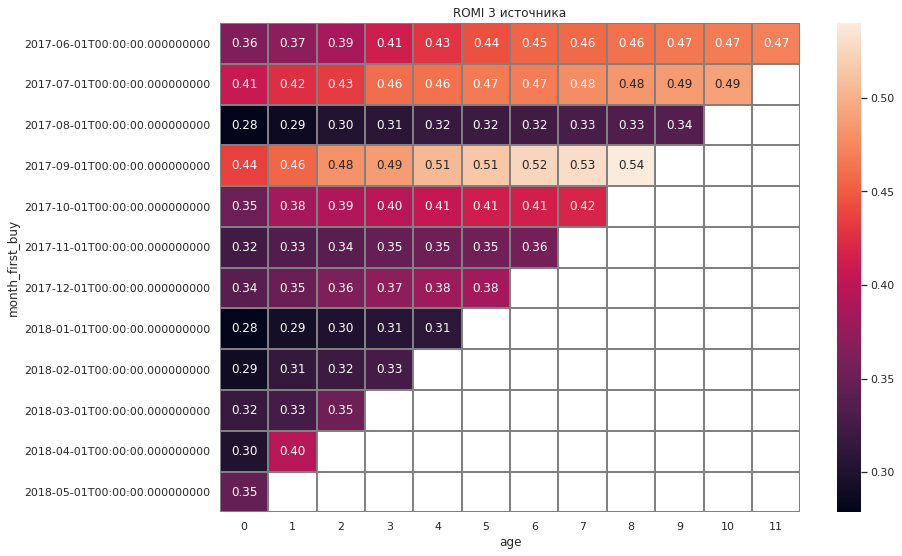

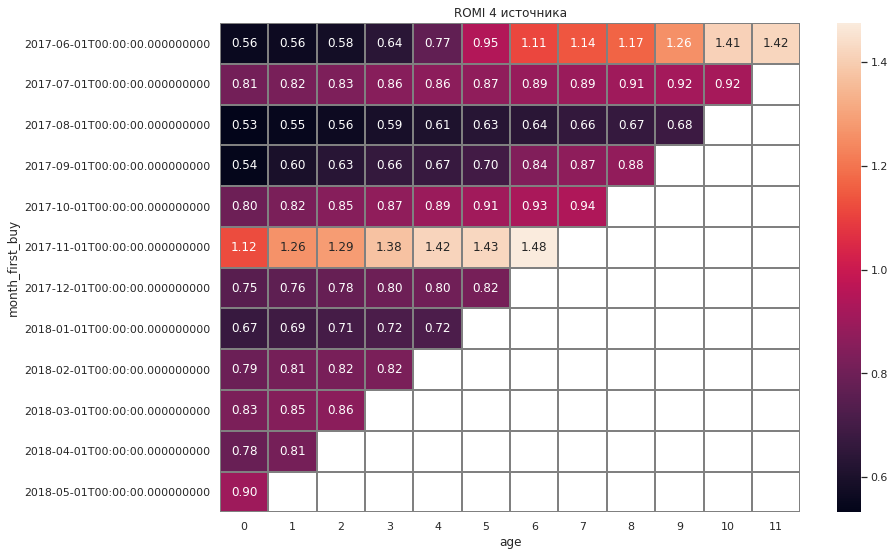

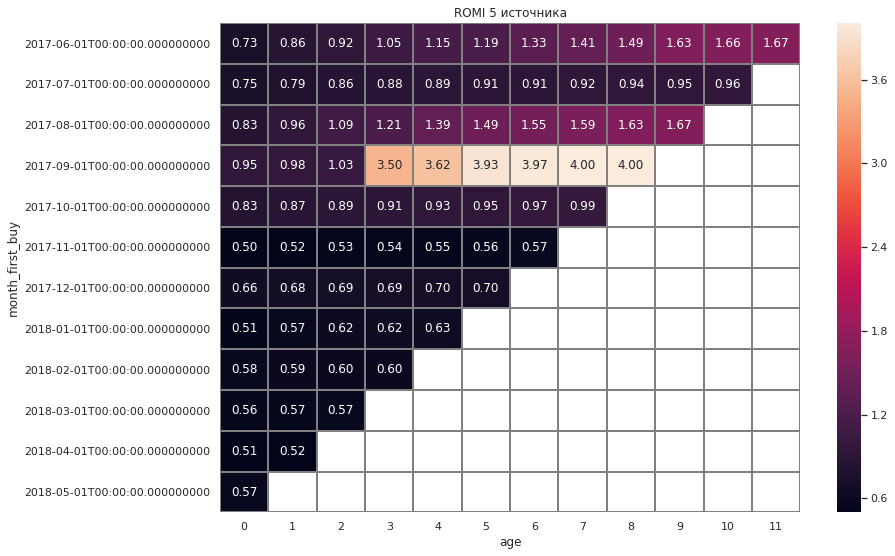

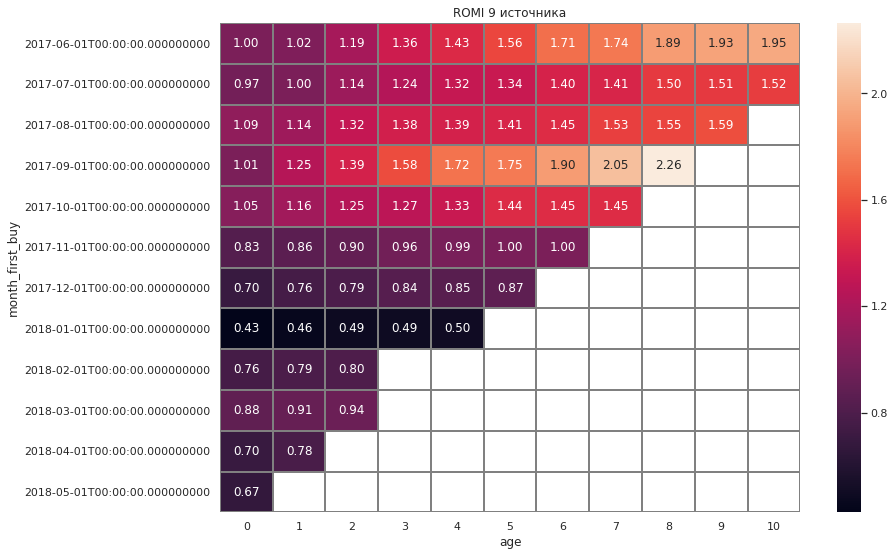

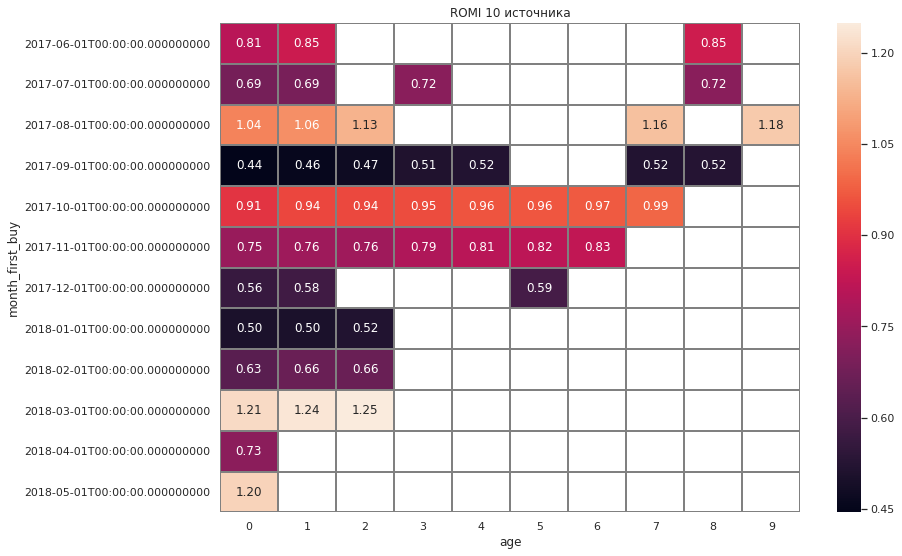

In [122]:
source_ids = costs['source_id'].unique()
for i in source_ids:
    romi_for_source(i, orders, costs)

(Для 7 источника нет смысла выводить таблицу - там всего один покупатель.)

Судя по полученным результатам можно сказать, что 3 источник очень сильно тянет общий ROMI вниз. За 11 месяцев его средние значения не доходят даже до 0.5. Нужно срочно оптимизировать расходы, связанные с этим источником. Также стоит обратить пристальное внимание на 4, 10 источники, где ROMI выходит за 1 только к 9-10 месяцу, что довольно долго.

In [123]:
orders.groupby('first_source')['uid'].nunique()

first_source
1      2899
2      3506
3     10473
4     10296
5      6931
7         1
9      1088
10     1329
Name: uid, dtype: int64

**Напишите вывод: порекомендуйте маркетологам, куда и сколько им стоит вкладывать денег?**

В целом, показатели метрики ROMI не могут вызвать удовлетворение (0.86), что говорит нам о том, что на данном этапе наш сервис убыточен. 

Чтобы увеличить общий ROMI, надо подтянуть значения по самым проблемным ROMI по источникам. Если взглянуть на общее количество пользователей, привлеченных из каждого источника, то можно увидеть, что 3 и 4 источники забирают на себя подавляющее большинство постетителей. Однако расходы на них тоже довольно большие (САС 3 источника - самый большой в любой момент времени). Нужно срочно уменьшать расходы на этот источник. 

Большее внимание стоит обратить на 1 источник. Его ROMI становится больше 1 уже ко второму месяцу, а к 9 составляет уже 3.5. Нужно увеличить расходы на этот источник, так как его пользователи окупаются очень быстро.

Если рекомндовать тип устройства, который был бы более выгоден нашему бизнесу, то это безусловно desktop, метрика LTV для данного типа устройства превышает LTV для touch почти на 40% (8.43 и 6 соответственно).